In [1]:
from data_generator import *

In [2]:
data = support_queue_data_generator()

company_id is numeric, changing to integer
company_size is numeric, changing to integer
user_id is numeric, changing to integer
company_id is numeric, changing to integer
staff_id is numeric, changing to integer
ticket_id is numeric, changing to integer
user_id is numeric, changing to integer
company_id is numeric, changing to integer
created_at is a timestamp, changing now
ticket_id is numeric, changing to integer
timestamp is a timestamp, changing now
ticket_id is numeric, changing to integer
staff_id is numeric, changing to integer
matched_at is a timestamp, changing now


In [6]:
type(data)

dict

```

CREATE TABLE companies (
    company_id SERIAL PRIMARY KEY,
    company_name TEXT NOT NULL,
    company_size INTEGER NOT NULL
);

CREATE TABLE users (
    user_id SERIAL PRIMARY KEY,
    user_name TEXT NOT NULL,
    company_id INTEGER REFERENCES companies(company_id)
);

CREATE TABLE support_staff (
    staff_id SERIAL PRIMARY KEY,
    staff_name TEXT NOT NULL,
    experience_level TEXT NOT NULL
);

CREATE TABLE support_tickets (
    ticket_id SERIAL PRIMARY KEY,
    user_id INTEGER REFERENCES users(user_id),
    company_id INTEGER REFERENCES companies(company_id),
    issue_category TEXT NOT NULL,
    created_at TIMESTAMP NOT NULL
);

CREATE TABLE ticket_status (
    status_id SERIAL PRIMARY KEY,
    ticket_id INTEGER REFERENCES support_tickets(ticket_id),
    status TEXT NOT NULL,
    timestamp TIMESTAMP NOT NULL
);

CREATE TABLE matches (
    match_id SERIAL PRIMARY KEY,
    ticket_id INTEGER REFERENCES support_tickets(ticket_id),
    staff_id INTEGER REFERENCES support_staff(staff_id),
    matched_at TIMESTAMP NOT NULL
);
```

In [3]:
# EDA
import pandas as pd
import matplotlib.pyplot as plt

# calculate wait times...
ticket_match = pd.merge(data["support_tickets"],data["matches"], on = "ticket_id",how = "left")

In [4]:
# perform the calculation
# matched_at - created_at

wait_times = pd.to_datetime(ticket_match['matched_at']) - pd.to_datetime(ticket_match['created_at'])
ticket_match['wait_times'] = wait_times

In [5]:
ticket_match.head()

,ticket_id,user_id,company_id,issue_category,created_at,staff_id,matched_at,wait_times
0,1,11,35,Account,2024-06-13 00:15:09.017292,44,2024-06-13 00:16:54.017292,0 days 00:01:45
1,2,32,21,Technical,2024-03-02 11:08:53.017292,32,2024-03-02 11:16:30.017292,0 days 00:07:37
2,3,373,32,General Inquiry,2024-02-14 16:51:58.017292,16,2024-02-14 17:01:45.017292,0 days 00:09:47
3,4,223,8,Account,2024-07-02 20:11:00.017292,32,2024-07-02 20:12:58.017292,0 days 00:01:58
4,5,78,10,Billing,2024-04-03 06:02:14.017292,45,2024-04-03 06:04:10.017292,0 days 00:01:56


In [ ]:
# do we tell a more complicated story about why people are waiting so long
# or do we pop open the data generator

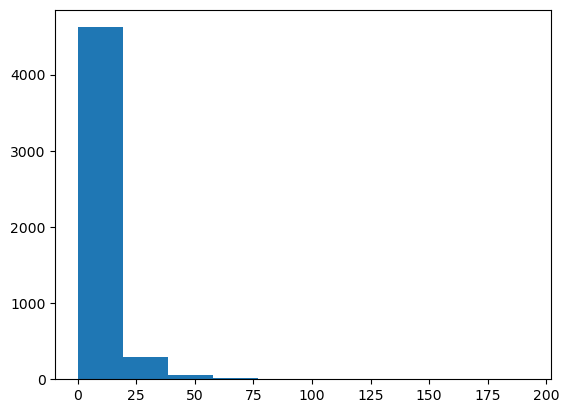

In [6]:
# wait_times.describe()

plt.figure()
plt.hist(wait_times.dt.seconds/60)
plt.show()

In [112]:
pd.Timestamp('2023-01-01') 

Timestamp('2023-01-01 00:32:34')

In [10]:
# ticket can't start as being closed - first status should always be opened.
# there's a logic sequence to ticket statuses, they actually should not be chosen randomly
# active / inactive


data["ticket_status"].loc[data["ticket_status"]['ticket_id'] == 1,:]

,ticket_id,status,timestamp
0,1,active,2024-06-13 00:16:54.017292
5000,1,inactive,2024-06-13 00:43:24.017292
